# Streamling your code
We will:
- extract data from CSV to create a `geopandas.GeoDataFrame`
- do more customizations for maps and matplotlib figures 
- go over strategies to streamline your code 

In [1]:
import os

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt 

# Display all columns when loking at dataframes 
pd.set_option("display.max.columns", None)

In [2]:
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)


# Drop first column 
power_plants = power_plants.drop(columns = 'Unnamed: 0')

power_plants.head()

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889
4,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900


In [3]:
# Import states data
fp = os.path.join('data','tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)

# Simplify column names 
states.columns = states.columns.str.lower()

states.head(3)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


## CSV to `geopandas.GeoDataFrame`

The power plants files is a CSV. Unlike shapefiles, `geopandas` doesn't have a way to extract a geometry column from CSV. So we need to specify this manually. 


We will use the long and lat columns, these indicate the location of the power plants in NAD83 CRS (EPSG:4259)

In [4]:
# Create points from latitude and longitude 
points = gpd.points_from_xy(power_plants.longitude, 
                   power_plants.latitude)

points


<GeometryArray>
[ <POINT (-160.497 55.34)>,  <POINT (-87.357 33.459)>,
   <POINT (-88.01 31.007)>,  <POINT (-86.283 32.584)>,
 <POINT (-106.375 31.757)>,  <POINT (-87.781 32.602)>,
  <POINT (-86.052 33.784)>,   <POINT (-87.45 33.255)>,
  <POINT (-86.255 32.619)>,  <POINT (-86.338 33.426)>,
 ...
  <POINT (-80.124 35.396)>,   <POINT (-77.898 35.36)>,
  <POINT (-78.077 35.299)>,  <POINT (-78.077 35.299)>,
  <POINT (-80.652 35.556)>,   <POINT (-82.376 35.38)>,
  <POINT (-79.368 36.009)>,  <POINT (-79.736 35.273)>,
   <POINT (-73.91 42.877)>,  <POINT (-77.276 41.838)>]
Length: 12009, dtype: geometry

In [5]:
# Create geodataframe 
power_plants = gpd.GeoDataFrame(power_plants, # Data
                 geometry = points, # specify geometry column
                 crs = 'EPSG:4269') # specify CRS 

<Axes: >

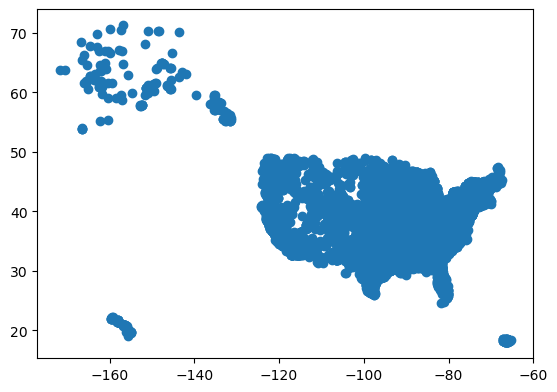

In [6]:
power_plants.plot()

## f-strings

We have printed variable susing string inise `print()`. 
Example:

In [7]:
print('CRS: ', power_plants.crs)

CRS:  EPSG:4269


f-strings = formated string. The simplest syntax for an f-string is:
```default
f" some text {replace}"
```

`replace` can be a variable, an express, a function, or method call. 

In [8]:
# Explore CRS
print(f"ellipsoid: {power_plants.crs.ellipsoid}")
print(f"datum: {power_plants.crs.datum}")

ellipsoid: GRS 1980
datum: North American Datum 1983


In [9]:
print(f"{'Is the CRS geographic?': <25} {power_plants.crs.is_geographic}")
print(f"{'Is the CRS projected?': <25} {power_plants.crs.is_projected}") # <25 adds spacing 

Is the CRS geographic?    True
Is the CRS projected?     False


## Explore TIGER shapefile 

Preliminary information about the states geodataframe. 



In [10]:
states.head()

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


EPSG:4269


<Axes: >

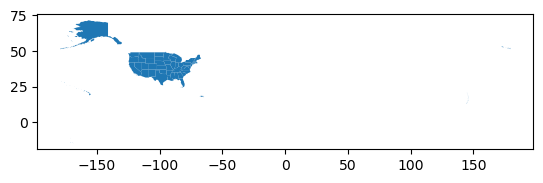

In [11]:
print(states.crs)
states.plot()

## `for `loops
It can be easier to work with codes as numbers instead of strings, let's update the corresponding columns in the states geo-dataframe. 



In [12]:
# Examine if the region, division, statefp columns are string or numeric 
print(f"region is string dtype? {is_string_dtype(states['region'])}")
print(f"division is string dtype? {is_string_dtype(states['division'])}")
print(f"statefp is string dtype? {is_string_dtype(states['statefp'])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


This inconvient because it reapeats the same code. Instead use a for loop to streamline:

In [13]:
code_cols = ['region', 'division', 'statefp']

# Check whether codes columns are strings
for column in code_cols: 
    print(f"{column} is string dtype? {is_string_dtype(states[column])}")


region is string dtype? True
division is string dtype? True
statefp is string dtype? True


**DRY code**
DRY = Don't repeat yourself = core programing principle that encourages reducing redundancy and consolidating repeated logic.  Use a for loop instead. 

## `assert`

The `assert` keyword doe snothing if the expression next to it evaluates to `True` and it raises an `AssertionError` exception and stops your code from running further if not. 

We use it to integrate tests into our code.

Example >>


In [15]:
# Does nothing if statement is True
#assert 2 + 2 == 4

# Raise an error if statement is False 
#assert 2 + 2 == 3

A workflow for updating the data type of code columns to be integers: 

for each column in code_columns:
    convert column to numeric
    check if column is numeric using assert 

In [ ]:
# Update code columns into integers 

# For each column in the code, I am overriding the column as an integer and checking with assert to see if it worked. 

for column in code_cols:
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column])

In [ ]:
states.dtypes

## Data selection
For this lesson, we want to use only data for the contiguous states. The data covers a bigger extension: 

In [ ]:
states.plot()

## Check-in 

1. What are the unique values for region, division, or state codes in the data? 
2. Which codes should we select to only keep states in the contigous US? 

In [ ]:
states.columns

In [ ]:
# 1. unique values
print(states[['region', 'division', 'statefp']].nunique())
print(states['region'].nunique())
print(states['division'].nunique())
print(states['statefp'].nunique())


In [16]:
# Select contiguous US states
contiguous = states[(states.region!=9) & (~states.statefp.isin([2,15]))] # ~ negates 

The ~ tilde symbol is used in Python to negate a statement. So the previous line could be read as “the values in df’s column which are not in the list [val1, val2, val3].”

<Axes: >

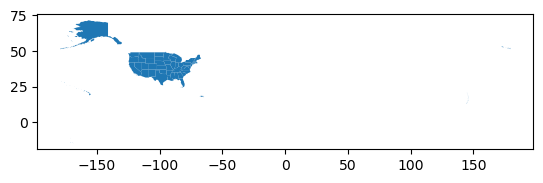

In [17]:
contiguous.plot()

## Check-in 
Select the data in the `power_plants` data frame for the contiguous US states. 

In [ ]:
power_plants.columns

In [ ]:
power_plants = power_plants[~power_plants['state'].isin(['Puerto Rico', 'Hawaii', 'Alaska'])]

## Plotting

In [ ]:
fig, ax = plt.subplots(figsize = (9,5)) # update figure size 

# Remove the axis for a cleaner map
ax.axis('off')

# Title 
ax.set_title('Operable electric generating plants in the contiguous US')

# Add states
contiguous.plot(ax = ax, 
                color = 'none')

# Add power plants colored by energy source 
power_plants.plot(ax=ax,
                  column = 'primsource', # color by this column 
                  legend = TRUE, 
                  markersize= 4, 
                  cmap = 'tap20', #color pallette 
                  alpha = 0.5) 

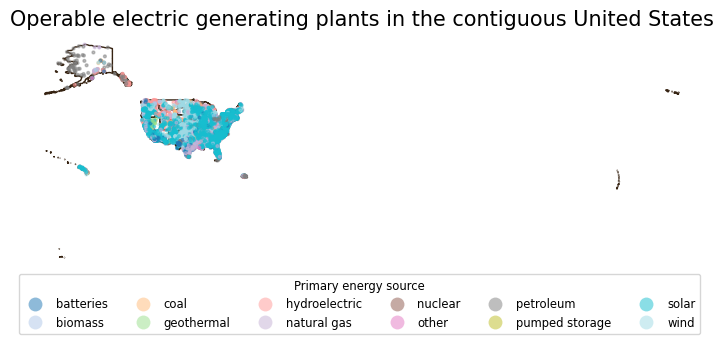

In [18]:
fig, ax = plt.subplots(figsize=(9, 5)) # Update figure size

# Remove the axis for a cleaner map
ax.axis('off')

# Title for the plot
ax.set_title('Operable electric generating plants in the contiguous United States', 
              fontsize=15)

# Add states
contiguous.plot(ax=ax,
               color='none',
               edgecolor='#362312')

# Add electric power plants colored by energy source
power_plants.plot(ax=ax, 
                  column='primsource',
                  legend=True,
                  markersize=4,
                  cmap='tab20',
                  alpha=0.5,
                  legend_kwds={
                      'title': 'Primary energy source',
                      'title_fontsize': 'small',
                      'fontsize': 'small',
                      'loc': 'upper left',
                      'bbox_to_anchor': (0, 0),
                      'ncol': 6  
                  })
                  
plt.show()

## `for` with `zip`

Often, we need to iterate simultaneously over two lists (or other iterables). The `zip()` function in Python allows you to combine two or more lists (or other iterables) so that you can iterate over their elements in pairs. When used with a for loop, it lets you process elements from each list together, like this example: 

In [19]:
# Iterate over a single list 
numbers = [1,2,3]

for num in numbers:
    print(num + 1)

2
3
4


In [20]:
# Iterate over two lists in pairs using zip()

letters = ['a', 'b', 'c']
for num, letter in zip(numbers, letters):
    print(num,letter)

1 a
2 b
3 c


Text(0.5, 1.0, 'This is axis 2')

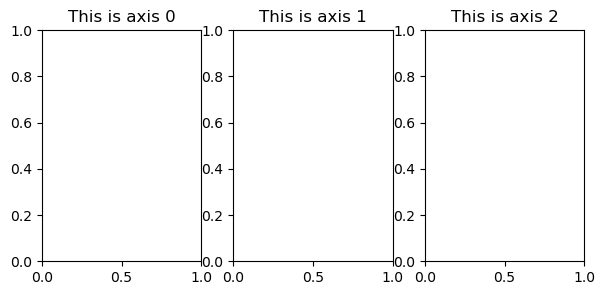

In [22]:
fig,axes = plt.subplots(nrows=1, ncols = 3, figsize = (7,3))

axes[0].set_title('This is axis 0')
axes[1].set_title('This is axis 1')
axes[2].set_title('This is axis 2')

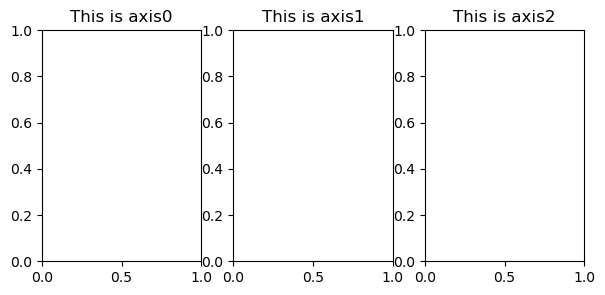

In [26]:
# use zip to create the same subplots and avoid redundancy
fig,axes = plt.subplots(nrows = 1, ncols = 3, figsize = (7,3))

for ax, i in zip(axes,[0,1,2]):
    ax.set_title(f'This is axis{i}')

plt.show()

In [28]:
power_plants[power_plants['state'] == 'California']

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
19,11589,34,Rollins,13402,Nevada Irrigation District,IPP Non-CHP,15531 Arrow Head Lane,Colfax,Placer,California,95713.0,hydroelectric,Hydroelectric = 12.1 MW,Conventional Hydroelectric,12.1,12.1,NaN,NaN,NaN,NaN,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.953341,39.134259,POINT (-120.95334 39.13426)
38,11608,72,Venice Hydro,12397,Metropolitan Water District of S CA,Electric Utility,3815 Sepulveda Blvd,Culver City,Los Angeles,California,90230.0,hydroelectric,Hydroelectric = 10.1 MW,Conventional Hydroelectric,10.1,10.1,NaN,NaN,NaN,NaN,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-118.416800,34.011350,POINT (-118.41680 34.01135)
54,11624,104,J S Eastwood,17609,Southern California Edison Co,Electric Utility,Hwy 168 Sierra National Forest,Shaver Lake,Fresno,California,93664.0,pumped storage,Pumped Storage = 199.8 MW,Hydroelectric Pumped Storage,199.8,199.8,NaN,NaN,NaN,NaN,NaN,199.8,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-119.256700,37.147926,POINT (-119.25670 37.14793)
74,11644,151,McClure,12745,Modesto Irrigation District,Electric Utility,639 S. McClure Rd.,Modesto,Stanislaus,California,95354.0,natural gas,"Natural Gas = 53.5 MW, Petroleum = 53.5 MW",Natural Gas Fired Combustion Turbine; Petroleu...,142.4,107.0,NaN,NaN,NaN,NaN,NaN,NaN,53.5,NaN,53.5,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.931390,37.629360,POINT (-120.93139 37.62936)
80,11650,161,Turlock Lake,19281,Turlock Irrigation District,Electric Utility,21642 Davis Road,Hickman,Stanislaus,California,95323.0,hydroelectric,Hydroelectric = 3.3 MW,Conventional Hydroelectric,3.3,3.3,NaN,NaN,NaN,NaN,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.594678,37.611461,POINT (-120.59468 37.61146)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11931,23500,66472,San Manuel Central Plant Cogens,65525,San Manuel Mission Band of Indians,Industrial CHP,777 San Manuel Blvd.,Highland,San Bernardino,California,92346.0,natural gas,Natural Gas = 5 MW,Natural Gas Internal Combustion Engine,5.4,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-117.230250,34.151193,POINT (-117.23025 34.15119)
11942,23511,66492,Henry Miller RD,65537,Henry Miller Reclamation District,Commercial Non-CHP,7767 Santa Rita Grade,Dos Palos,Merced,California,93620.0,solar,Solar = 1.5 MW,Solar Photovoltaic,1.5,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.635230,37.054300,POINT (-120.63523 37.05430)
11944,23513,66500,Valley Center 85,65552,Terra-Gen Operating Co-BESS 2,IPP Non-CHP,29523 Valley Center Road,Valley Center,San Diego,California,92082.0,batteries,Battery = 85 MW,Batteries,85.0,85.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-117.017744,33.227236,POINT (-117.01774 33.22724)
11946,23515,66502,Valley Center 54,65552,Terra-Gen Operating Co-BESS 2,IPP Non-CHP,29523 Valley Center Road,Valley Center,San Diego,California,92082.0,batteries,Battery = 54 MW,Batteries,54.0,54.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-117.017744,33.227236,POINT (-117.01774 33.22724)


In [51]:
states.head()

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


In [52]:
# select california power plants
ca_power_plants = power_plants[power_plants['state'] == 'California']


# create a list of top three power plants
top_sources = ['solar', 'natural gas', 'hydroelectric']

# isolate ca boundary
ca_boundary = states[states['name'] == 'California']



In [48]:
ca_power_plants.groupby('primsource').sum

<bound method GroupBy.sum of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x16db9a450>>

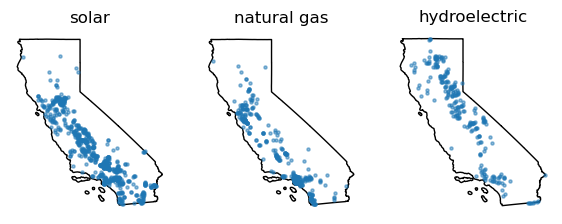

In [59]:
# use zip to create the same subplots and avoid redundancy
fig,ax = plt.subplots(nrows = 1, ncols = 3, figsize = (7,3))


for ax, i in zip(ax,top_sources):
    ax.set_title(i) 
    ax.axis('off') # Removes axes 
    ca_boundary.plot(ax = ax, 
                     color = 'none', 
                     edgecolor = 'black')
    ca_power_plants[ca_power_plants['primsource'] == i]. plot(ax = ax, 
                                                              markersize=5, 
                                                              alpha = 0.5)


plt.show()